In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('ratings.csv')
remarks = pd.read_csv('remarks.csv')
remark_supp = pd.read_csv('remarks_supp_opp.csv', low_memory=False)

#### train.csv

In [3]:
## multiple inputs for same employee
X_given = pd.read_csv('train.csv')
check = X_given.copy()
check['emp+comp'] = list(zip(check['emp'],check['comp']))
check_ser = check.groupby('emp+comp').size()
dups = check_ser[check_ser>1].index
check[check['emp+comp'].isin(dups)].sort_values(by='emp')

,id,emp,comp,lastratingdate,left,emp+comp
2778,1098,2,vcqsbirc,17-09-2015,1,"(2, vcqsbirc)"
2486,1099,2,vcqsbirc,17-09-2015,1,"(2, vcqsbirc)"
954,3026,2,lgqwnfsg,10-03-2017,1,"(2, lgqwnfsg)"
1075,3027,2,lgqwnfsg,11-03-2017,1,"(2, lgqwnfsg)"
3502,2755,3,ylpksopb,18-04-2016,1,"(3, ylpksopb)"
3336,2756,3,ylpksopb,19-04-2016,1,"(3, ylpksopb)"
1400,1104,10,vcqsbirc,02-12-2015,1,"(10, vcqsbirc)"
3366,1097,10,vcqsbirc,02-12-2015,1,"(10, vcqsbirc)"
1254,3043,19,lgqwnfsg,23-02-2017,1,"(19, lgqwnfsg)"
751,3028,19,lgqwnfsg,21-02-2017,1,"(19, lgqwnfsg)"


In [4]:
## dropping same employees input
X = X_given.drop_duplicates(['emp','comp'],keep='first').copy()
X

,id,emp,comp,lastratingdate,left
0,2228,939,phcvroct,17-10-2016,1
1,4349,250,jblrepyr,19-03-2017,0
2,945,134,ewpvmfbc,21-09-2016,0
3,4553,164,wsmblohy,17-03-2017,0
4,941,129,ewpvmfbc,04-04-2016,0
...,...,...,...,...,...
3521,783,87,ocsicwng,20-03-2017,0
3522,3655,14,jnvpfmup,17-03-2017,0
3523,1460,53,xccmgbjz,09-03-2017,0
3524,842,168,ocsicwng,01-03-2017,0


In [5]:
ratings.head()

,emp,comp,Date,rating
0,31,bnivzbfi,01-02-2016,4
1,33,bnivzbfi,01-02-2016,4
2,79,bnivzbfi,01-02-2016,4
3,94,bnivzbfi,01-02-2016,4
4,16,bnivzbfi,01-02-2016,2


### feature1 - avg rating for company in last one month from lastratingdate of employees

In [6]:
import time
start = time.time()

X['lastratingdate'] = pd.to_datetime(X['lastratingdate'])
ratings['Date'] = pd.to_datetime(ratings['Date'])

def find_ratings(ser):
    df = ratings[ratings['comp']==ser['comp']]
    filt = ((df['Date']<ser['lastratingdate']) & 
            (df['Date']>(ser['lastratingdate']-pd.DateOffset(days=15))))
    return df[filt]['rating'].mean()

comp_rating = X.apply(find_ratings,axis=1)

end = time.time()
print(end - start)


143.78348231315613


In [7]:
## for null in comp ratings

def remaining_ratings(ser):
    df = ratings[ratings['comp']==ser['comp']]
    filt = ((df['Date']<ser['lastratingdate']) & 
            (df['Date']>(ser['lastratingdate']-pd.DateOffset(months=2))))
    return df[filt]['rating'].mean()

filling_nas = X[np.isnan(comp_rating)].apply(remaining_ratings,axis=1)


In [8]:
filling_nas
comp_rating.fillna(filling_nas,inplace=True)

### feature2 - avg of last 6 ratings for training data

In [9]:
last_ratings = ratings.copy()
last_ratings['Date'] = pd.to_datetime(last_ratings.Date)
df_ra = last_ratings.groupby(['emp','comp']).apply(pd.DataFrame.sort_values, by='Date',ascending=False)
last6_ratings = df_ra.groupby(level=[0,1]).head(6)
last6_ratings

emp      comp       Date  rating
emp comp                                             
1   azalutpt 146040    1  azalutpt 2014-11-26       4
             146035    1  azalutpt 2014-11-25       4
    ejeyobsm 153742    1  ejeyobsm 2017-12-01       3
             154152    1  ejeyobsm 2017-11-02       3
             153724    1  ejeyobsm 2017-11-01       3
...                  ...       ...        ...     ...
999 phcvroct 102830  999  phcvroct 2017-03-02       3
             105036  999  phcvroct 2017-02-26       3
             99828   999  phcvroct 2017-02-01       3
             102341  999  phcvroct 2017-01-30       3
             101327  999  phcvroct 2017-01-21       3

[22216 rows x 4 columns]

In [10]:
last6_ratings.reset_index(drop=True,inplace=True)
final_ratings = pd.DataFrame(last6_ratings.groupby(['emp','comp'])['rating'].mean()).reset_index()
final_ratings

,emp,comp,rating
0,1,azalutpt,4.000000
1,1,ejeyobsm,3.000000
2,1,ewpvmfbc,3.000000
3,1,fqsozvpv,2.000000
4,1,iqdwmigj,2.666667
...,...,...,...
4372,991,phcvroct,3.000000
4373,995,phcvroct,2.666667
4374,996,phcvroct,3.000000
4375,997,phcvroct,3.000000


### feature3 - no of remarks made  by employee

In [11]:
remarks.describe(include='O')

,comp,remarkId,txt,remarkDate
count,82756,82756,82539,82755
unique,36,41399,959,775
top,phcvroct,lfqbcxjl,***********,29-11-2016
freq,15480,2,1034,506


In [12]:
###there are duplicates in remarks
dd = pd.DataFrame(remarks.groupby(remarks.columns.tolist(),
                             as_index=False).size())
dd.reset_index().rename({0:'inputs'},axis=1)

,emp,comp,remarkId,txt,remarkDate,inputs
0,-217,phcvroct,lgqwfbms,**********************************************...,26-02-2015,2
1,-216,phcvroct,blsxiuwo,**************,03-03-2015,2
2,-216,phcvroct,sjpdqipl,***************************************,27-02-2015,2
3,-216,phcvroct,ysmjstbv,**********************,25-02-2015,2
4,-214,phcvroct,nybzkjxy,****,06-03-2015,2
...,...,...,...,...,...,...
41905,996,phcvroct,nycehuwf,*****,05-09-2016,2
41906,999,phcvroct,burkmuru,**********************************************...,29-09-2016,2
41907,999,phcvroct,eatxkqlh,**********************************************...,07-10-2016,2
41908,999,phcvroct,rvsmoyen,**********************************************...,10-10-2016,2


In [13]:
unique_remarks = remarks.drop_duplicates(keep='first').copy()
unique_remarks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42019 entries, 0 to 82755
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   emp         42019 non-null  int64 
 1   comp        42019 non-null  object
 2   remarkId    42019 non-null  object
 3   txt         41910 non-null  object
 4   remarkDate  42018 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [14]:
X['emp+comp'] = list(zip(X['emp'],X['comp']))
unique_remarks['emp+comp'] = list(zip(unique_remarks['emp'],unique_remarks['comp']))

lens = unique_remarks.groupby('emp+comp').size()
lens_df = pd.DataFrame([lens.index,np.array(lens)]).T
lens_df.columns=['emp+comp','#remarks']
mix = pd.merge(X,lens_df,how='left')
num_remarks = mix['#remarks'].copy()
print(num_remarks)
num_remarks.isnull().sum()

0       NaN
1        52
2         5
3         5
4         2
       ... 
3500      9
3501      2
3502    NaN
3503      3
3504    NaN
Name: #remarks, Length: 3505, dtype: object


1200

#### feature on hold - num of oppose (coz of correlation 0.64 with no. of remarks)

In [15]:
remark_supp['emp+comp'] = list(zip(remark_supp['emp'],remark_supp['comp']))

def get_num_supp(X):
    
    num_supports =  pd.merge(X,remark_supp[['emp+comp','support']],how='left').groupby(
                    'emp+comp')['support'].sum()

    return num_supports
num_supports = get_num_supp(X)


In [16]:
merged_train = pd.merge(X, final_ratings, how='left')
merged_train['num_support'] = merged_train['emp+comp'].map(num_supports)
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3505 entries, 0 to 3504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3505 non-null   int64         
 1   emp             3505 non-null   int64         
 2   comp            3505 non-null   object        
 3   lastratingdate  3505 non-null   datetime64[ns]
 4   left            3505 non-null   int64         
 5   emp+comp        3505 non-null   object        
 6   rating          3505 non-null   float64       
 7   num_support     3505 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 246.4+ KB


#### mean_encoding for comp 

In [17]:
## mean encoding for companies
mean_encode = merged_train.groupby('comp')['left'].mean()
merged_train['comp_code'] = merged_train['comp'].map(mean_encode)

### X_train

In [18]:
X_train = merged_train[['comp_code','rating']].copy()
y_train = merged_train['left']

# X_train['num_remarks'] = num_remarks
X_train['comp_rating']=comp_rating
X_train['num_support'] = list(map(int,merged_train['num_support']))

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3505 entries, 0 to 3504
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comp_code    3505 non-null   float64
 1   rating       3505 non-null   float64
 2   comp_rating  3430 non-null   float64
 3   num_support  3505 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 136.9 KB


In [19]:
# X_train['num_remarks'].fillna(0,inplace=True)

X_train['comp_rating'].fillna(2.5,inplace=True)

### test data

In [20]:
test = pd.read_csv('test.csv')
len(test)

882

##### 1. last 6 ratings X_test

In [21]:
merged_test = pd.merge(test, final_ratings, how='left' )
merged_test['comp_code'] = merged_test['comp'].map(mean_encode)
X_test = merged_test[['comp_code','rating']].copy()
X_test

,comp_code,rating
0,0.062731,4.000000
1,0.027027,1.666667
2,0.026316,2.666667
3,0.485043,3.000000
4,0.485043,2.500000
...,...,...
877,0.062893,2.333333
878,0.000000,4.000000
879,0.000000,3.250000
880,0.026316,3.000000


##### 2. company ratings in last 15 days by employees

In [22]:
test['lastratingdate'] = pd.to_datetime(test['lastratingdate'])
comp_test_rating = test.apply(find_ratings,axis=1)

comp_test_rating.isnull().sum()

47

In [23]:
## for null in comp ratings
filling_test_nas = test[np.isnan(comp_test_rating)].apply(remaining_ratings,axis=1)
comp_test_rating.fillna(filling_test_nas,inplace=True)

##### 3. no of remarks

In [24]:
test['emp+comp'] = list(zip(test['emp'],test['comp']))
test_mix = pd.merge(test,lens_df,how='left')
test_num_remarks = test_mix['#remarks'].copy()
# X_test['num_remarks'] = test_num_remarks
# X_test['num_remarks'].fillna(0,inplace=True)
X_test['comp_rating'] = comp_test_rating
X_test['comp_rating'].fillna(2.5,inplace=True)

##### 4. no of oppose given by an emp

In [25]:
merged_test['emp+comp'] = list(zip(merged_test['emp'],merged_test['comp']))
num_test_supports = get_num_supp(merged_test)
merged_test['num_support'] = merged_test['emp+comp'].map(num_test_supports)

X_test['num_support'] = list(map(int,merged_test['num_support']))
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 881
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comp_code    882 non-null    float64
 1   rating       882 non-null    float64
 2   comp_rating  882 non-null    float64
 3   num_support  882 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 34.5 KB


#### y_train

In [27]:
y_train.value_counts()

0    2932
1     573
Name: left, dtype: int64

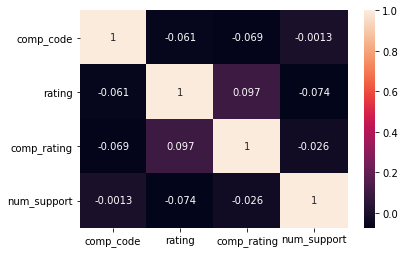

In [28]:
import seaborn as sns

Var_Corr = X_train.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

### Training 

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

In [30]:
def my_custom_score_fun(y_true, y_pred):
    t = np.sum(y_true[y_pred==y_true])
    n = len(y_true[y_pred==y_true])-t 
    
    acc = (t*5+n*1)/(5*np.sum(y_true==1) + np.sum(y_true==0))
    return acc
my_score = make_scorer(my_custom_score_fun, greater_is_better=True)

#### Logistic Regression

In [453]:
grid = {
    'penalty': ['l2'],
    'C':[1e1,1e2,1e3,1e4],
    
       }
LR_clf = LogisticRegression()

LR_clf_grid = GridSearchCV(LR_clf, param_grid=grid,scoring=my_score,cv=3,n_jobs=-1)
LR_clf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [10.0, 100.0, 1000.0, 10000.0],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(my_custom_score_fun), verbose=0)

In [454]:
LR_clf_grid.best_score_

0.6931292501705691

In [455]:
LR_clf_grid.best_estimator_

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### RandomForestClassifier

In [456]:
grid = {'min_samples_leaf': [1,2,4,8,16,32,40,50], 
        'max_depth': [3,5,10,15,20],
        'n_estimators' : [25,50,100,150,200]}

RF_clf = RandomForestClassifier()
RF_clf_grid = GridSearchCV(RF_clf, param_grid=grid, scoring=my_score, cv=3, n_jobs=-1)

RF_clf_grid.fit(X_train, y_train)#,sample_weight=raw_weights)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [457]:
RF_clf_grid.best_score_

0.7403835065444638

In [458]:
RF_clf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### SVM

In [383]:
grid = {'gamma': [1e-2,1e-1,1,1e1,1e2], 
        'C' : [1e-2,1e-1,1,1e1,1e2,1e3]}

SVC_clf = SVC()
SVC_clf_grid = GridSearchCV(SVC_clf, param_grid=grid, scoring=my_score,cv=3,n_jobs=-1)

SVC_clf_grid.fit(X_train, y_train)#,sample_weight=weights)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10.0, 100.0, 1000.0],
                         'gamma': [0.01, 0.1, 1, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(my_custom_score_fun), verbose=0)

In [386]:
res = pd.DataFrame(SVC_clf_grid.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.284194,0.008569,0.140161,0.023337,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.505949,0.505694,0.505694,0.505779,0.000121,24
1,0.494263,0.047327,0.215147,0.007244,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.505949,0.505694,0.505694,0.505779,0.000121,24
2,0.901571,0.050016,0.372429,0.019530,0.01,1,"{'C': 0.01, 'gamma': 1}",0.505949,0.505694,0.505694,0.505779,0.000121,24
3,1.228217,0.019766,0.449938,0.035444,0.01,10,"{'C': 0.01, 'gamma': 10.0}",0.505949,0.505694,0.505694,0.505779,0.000121,24
4,1.164295,0.057040,0.475600,0.000997,0.01,100,"{'C': 0.01, 'gamma': 100.0}",0.505949,0.505694,0.505694,0.505779,0.000121,24
5,0.302138,0.001554,0.111715,0.001257,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.505949,0.505694,0.505694,0.505779,0.000121,24
6,0.494922,0.013910,0.203412,0.014678,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.594930,0.596273,0.611284,0.600829,0.007413,23
7,0.821550,0.012143,0.323738,0.008215,0.1,1,"{'C': 0.1, 'gamma': 1}",0.720124,0.698240,0.722050,0.713471,0.010799,16
8,1.096814,0.028498,0.520970,0.065994,0.1,10,"{'C': 0.1, 'gamma': 10.0}",0.636317,0.623188,0.653209,0.637571,0.012288,20
9,1.376312,0.162053,0.506736,0.044483,0.1,100,"{'C': 0.1, 'gamma': 100.0}",0.505949,0.505694,0.505694,0.505779,0.000121,24


In [384]:
SVC_clf_grid.best_score_

0.7384886806713659

In [385]:
SVC_clf_grid.best_estimator_

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

#### XGBoost

In [31]:
import xgboost as xgb
import time
start = time.time()


grid={
 "learning_rate"    : [ 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5 ] ,
 "reg_lambda"       : [ 1e-2,1e-1,1,1e1,1e2],
 "gamma"            : [ 1e-2,1e-1,1,1e1,1e2  ],
 "colsample_bytree" : [ 0.5,0.8,1  ],
 "n_estimators"     : [100,200,300,400,500]
}
XGB_clf = xgb.XGBClassifier()
XGB_clf_grid = XGB_clf
# XGB_clf_grid = GridSearchCV(XGB_clf, param_grid=grid, scoring=my_score)

XGB_clf_grid.fit(X_train, y_train)#, sample_weight=weights)



XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [33]:
X_train.head(1)

,comp_code,rating,comp_rating,num_support
0,0.485043,3.0,2.578073,0


In [32]:
XGB_clf_grid.feature_importances_

array([0.5837279 , 0.09954514, 0.10535822, 0.21136868], dtype=float32)

In [ ]:
#for tunning XGB - reg_lambda, gamma, n_estimators, learning rate, 
#                  colsample_bytree

In [516]:
XGB_clf_grid.best_score_

0.7714393978308272

In [517]:
XGB_clf_grid.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=100.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=100.0, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

#### Naive Bayes

In [523]:
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Neural Nets

In [71]:
from sklearn.neural_network import MLPClassifier
NN_clf = MLPClassifier(hidden_layer_sizes=(10,30,60))

NN_clf.fit(X_train, y_train)


# NN_clf_grid = GridSearchCV(NN_clf, param_grid=grid, scoring=my_score, cv=3, n_jobs=-1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 30, 60), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [72]:
pred_y_train = NN_clf.predict(X_train)

In [73]:
my_custom_score_fun(y_train, pred_y_train)

0.724512678971882

In [37]:
merged_test['left'] = NN_clf.predict(X_test)

In [38]:
merged_test

,id,emp,comp,lastratingdate,rating,comp_code,emp+comp,num_support,left
0,353,509,bnivzbfi,20-03-2017,4.000000,0.062731,"(509, bnivzbfi)",75,0
1,732,22,ocsicwng,17-03-2017,1.666667,0.027027,"(22, ocsicwng)",82,0
2,3076,2,siexkzzo,09-01-2017,2.666667,0.026316,"(2, siexkzzo)",19,0
3,2199,885,phcvroct,01-10-2016,3.000000,0.485043,"(885, phcvroct)",205,0
4,2145,756,phcvroct,06-02-2017,2.500000,0.485043,"(756, phcvroct)",7,0
...,...,...,...,...,...,...,...,...,...
877,4022,36,ydqdpmvi,05-10-2016,2.333333,0.062893,"(36, ydqdpmvi)",47,0
878,3397,30,fqsozvpv,14-03-2017,4.000000,0.000000,"(30, fqsozvpv)",11,0
879,1028,15,rujnkvse,30-01-2017,3.250000,0.000000,"(15, rujnkvse)",0,0
880,3179,127,siexkzzo,17-03-2017,3.000000,0.026316,"(127, siexkzzo)",12,0


In [39]:
sub = merged_test[['id','left']]

In [40]:
np.sum(sub['left']==1)

79

In [524]:
sub.set_index('id',inplace=True)
sub

,left
id,
353,0
732,0
3076,0
2199,1
2145,1
...,...
4022,0
3397,0
1028,0


In [525]:
sub.to_csv('submit_this.csv')